In [1]:
import keras,os
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.optimizers import Adam
import shutil

In [2]:
DATASET_PATH  = '../../people_and_animals/resnet_data'
IMAGE_SIZE = (224, 224)
NUM_CLASSES = 4
BATCH_SIZE = 8
FREEZE_LAYERS = 2
NUM_EPOCHS = 20
WEIGHTS_FINAL = 'resnet_eye_model.weight'

In [3]:
train_datagen = ImageDataGenerator(rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   channel_shift_range=10,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
train_batches = train_datagen.flow_from_directory(DATASET_PATH + '/eye_train',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE)

Found 1528 images belonging to 4 classes.


In [4]:
valid_datagen = ImageDataGenerator()
valid_batches = valid_datagen.flow_from_directory(DATASET_PATH + '/eye_v',
                                                  target_size=IMAGE_SIZE,
                                                  interpolation='bicubic',
                                                  class_mode='categorical',
                                                  shuffle=False,
                                                  batch_size=BATCH_SIZE)

Found 32 images belonging to 4 classes.


In [5]:
for cls, idx in train_batches.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))

Class #0 = A
Class #1 = B
Class #2 = C
Class #3 = D


In [6]:
net = ResNet50(include_top=False, weights='imagenet', input_tensor=None,
               input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3))
x = net.output
x = Flatten()(x)

In [7]:
x = Dropout(0.5)(x)

In [8]:
output_layer = Dense(NUM_CLASSES, activation='softmax', name='softmax')(x)

In [9]:
net_final = Model(inputs=net.input, outputs=output_layer)
for layer in net_final.layers[:FREEZE_LAYERS]:
    layer.trainable = False
for layer in net_final.layers[FREEZE_LAYERS:]:
    layer.trainable = True

In [10]:
net_final.compile(optimizer=Adam(lr=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
print(net_final.summary())

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
hist = net_final.fit_generator(steps_per_epoch=1,generator=train_batches, validation_data= valid_batches, validation_steps=1,epochs=1500)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/1500
1/1 [==============================] - 1s 1s/step - loss: 2.6551 - accuracy: 0.2500 - val_loss: 2.4586 - val_accuracy: 0.0000e+00
Epoch 2/1500
1/1 [==============================] - 0s 314ms/step - loss: 4.1987 - accuracy: 0.1250 - val_loss: 2.5529 - val_accuracy: 0.0000e+00
Epoch 3/1500
1/1 [==============================] - 0s 412ms/step - loss: 3.7691 - accuracy: 0.1250 - val_loss: 2.6772 - val_accuracy: 0.0000e+00
Epoch 4/1500
1/1 [==============================] - 0s 395ms/step - loss: 2.1775 - accuracy: 0.5000 - val_loss: 2.7496 - val_accuracy: 0.0000e+00
Epoch 5/1500
1/1 [==============================] - 0s 414ms/step - loss: 3.6044 - accuracy: 0.1250 - val_loss: 2.7172 - val_accuracy: 0.0000e+00
Epoch 6/1500
1/1 [==============================] - 0s 376ms/step - loss: 1.8589 - accuracy: 0.3750 - val_loss: 2.7045 - val_accuracy: 0.0000e+00
Epoch 7/1500
1/1 [==============================] -

1/1 [==============================] - 0s 394ms/step - loss: 1.6834 - accuracy: 0.6250 - val_loss: 1.8367 - val_accuracy: 0.1250
Epoch 113/1500
1/1 [==============================] - 0s 420ms/step - loss: 2.1757 - accuracy: 0.3750 - val_loss: 1.8170 - val_accuracy: 0.1250
Epoch 114/1500
1/1 [==============================] - 0s 367ms/step - loss: 1.9705 - accuracy: 0.3750 - val_loss: 1.7843 - val_accuracy: 0.1250
Epoch 115/1500
1/1 [==============================] - 0s 378ms/step - loss: 0.7871 - accuracy: 0.7500 - val_loss: 1.7598 - val_accuracy: 0.1250
Epoch 116/1500
1/1 [==============================] - 0s 326ms/step - loss: 1.4943 - accuracy: 0.3750 - val_loss: 1.7114 - val_accuracy: 0.1250
Epoch 117/1500
1/1 [==============================] - 0s 400ms/step - loss: 3.0133 - accuracy: 0.5000 - val_loss: 1.6716 - val_accuracy: 0.1250
Epoch 118/1500
1/1 [==============================] - 0s 382ms/step - loss: 1.3295 - accuracy: 0.6250 - val_loss: 1.6548 - val_accuracy: 0.1250
Epoch 1

Epoch 169/1500
1/1 [==============================] - 0s 356ms/step - loss: 0.5872 - accuracy: 0.8750 - val_loss: 1.0171 - val_accuracy: 0.5000
Epoch 170/1500
1/1 [==============================] - 0s 393ms/step - loss: 0.3769 - accuracy: 0.7500 - val_loss: 1.0277 - val_accuracy: 0.5000
Epoch 171/1500
1/1 [==============================] - 0s 375ms/step - loss: 1.2255 - accuracy: 0.3750 - val_loss: 1.0403 - val_accuracy: 0.5000
Epoch 172/1500
1/1 [==============================] - 0s 313ms/step - loss: 0.7556 - accuracy: 0.7500 - val_loss: 1.0568 - val_accuracy: 0.5000
Epoch 173/1500
1/1 [==============================] - 0s 362ms/step - loss: 1.4569 - accuracy: 0.7500 - val_loss: 1.0580 - val_accuracy: 0.5000
Epoch 174/1500
1/1 [==============================] - 0s 375ms/step - loss: 1.2773 - accuracy: 0.6250 - val_loss: 1.0719 - val_accuracy: 0.5000
Epoch 175/1500
1/1 [==============================] - 0s 367ms/step - loss: 1.5036 - accuracy: 0.6250 - val_loss: 1.0852 - val_accuracy:

Epoch 226/1500
1/1 [==============================] - 0s 379ms/step - loss: 2.0598 - accuracy: 0.3750 - val_loss: 0.7637 - val_accuracy: 0.7500
Epoch 227/1500
1/1 [==============================] - 0s 409ms/step - loss: 1.0696 - accuracy: 0.5000 - val_loss: 0.7463 - val_accuracy: 0.7500
Epoch 228/1500
1/1 [==============================] - 0s 375ms/step - loss: 2.7935 - accuracy: 0.3750 - val_loss: 0.7255 - val_accuracy: 0.7500
Epoch 229/1500
1/1 [==============================] - 0s 370ms/step - loss: 1.2139 - accuracy: 0.3750 - val_loss: 0.7007 - val_accuracy: 0.7500
Epoch 230/1500
1/1 [==============================] - 0s 364ms/step - loss: 1.5283 - accuracy: 0.5000 - val_loss: 0.6786 - val_accuracy: 0.7500
Epoch 231/1500
1/1 [==============================] - 0s 374ms/step - loss: 1.5244 - accuracy: 0.7500 - val_loss: 0.6701 - val_accuracy: 0.7500
Epoch 232/1500
1/1 [==============================] - 0s 411ms/step - loss: 1.0838 - accuracy: 0.5000 - val_loss: 0.6497 - val_accuracy:

Epoch 283/1500
1/1 [==============================] - 0s 403ms/step - loss: 1.8766 - accuracy: 0.3750 - val_loss: 0.5491 - val_accuracy: 0.7500
Epoch 284/1500
1/1 [==============================] - 0s 383ms/step - loss: 2.5730 - accuracy: 0.3750 - val_loss: 0.5641 - val_accuracy: 0.7500
Epoch 285/1500
1/1 [==============================] - 0s 423ms/step - loss: 0.9228 - accuracy: 0.5000 - val_loss: 0.5753 - val_accuracy: 0.7500
Epoch 286/1500
1/1 [==============================] - 0s 329ms/step - loss: 1.1175 - accuracy: 0.7500 - val_loss: 0.5887 - val_accuracy: 0.7500
Epoch 287/1500
1/1 [==============================] - 0s 414ms/step - loss: 3.9160 - accuracy: 0.2500 - val_loss: 0.5975 - val_accuracy: 0.7500
Epoch 288/1500
1/1 [==============================] - 0s 391ms/step - loss: 1.6867 - accuracy: 0.3750 - val_loss: 0.6118 - val_accuracy: 0.7500
Epoch 289/1500
1/1 [==============================] - 0s 379ms/step - loss: 2.0909 - accuracy: 0.5000 - val_loss: 0.6067 - val_accuracy:

Epoch 340/1500
1/1 [==============================] - 0s 384ms/step - loss: 2.3530 - accuracy: 0.6250 - val_loss: 0.5451 - val_accuracy: 0.7500
Epoch 341/1500
1/1 [==============================] - 0s 409ms/step - loss: 1.2351 - accuracy: 0.6250 - val_loss: 0.5390 - val_accuracy: 0.7500
Epoch 342/1500
1/1 [==============================] - 0s 366ms/step - loss: 1.5958 - accuracy: 0.6250 - val_loss: 0.5308 - val_accuracy: 0.7500
Epoch 343/1500
1/1 [==============================] - 0s 323ms/step - loss: 1.7518 - accuracy: 0.5000 - val_loss: 0.5152 - val_accuracy: 0.7500
Epoch 344/1500
1/1 [==============================] - 0s 351ms/step - loss: 2.3140 - accuracy: 0.2500 - val_loss: 0.5032 - val_accuracy: 0.7500
Epoch 345/1500
1/1 [==============================] - 0s 383ms/step - loss: 1.7754 - accuracy: 0.6250 - val_loss: 0.4954 - val_accuracy: 0.7500
Epoch 346/1500
1/1 [==============================] - 0s 399ms/step - loss: 0.8803 - accuracy: 0.5000 - val_loss: 0.4943 - val_accuracy:

Epoch 397/1500
1/1 [==============================] - 0s 366ms/step - loss: 0.8976 - accuracy: 0.3750 - val_loss: 0.4068 - val_accuracy: 0.7500
Epoch 398/1500
1/1 [==============================] - 0s 367ms/step - loss: 0.8618 - accuracy: 0.6250 - val_loss: 0.4149 - val_accuracy: 0.7500
Epoch 399/1500
1/1 [==============================] - 0s 362ms/step - loss: 0.7242 - accuracy: 0.7500 - val_loss: 0.4301 - val_accuracy: 0.6250
Epoch 400/1500
1/1 [==============================] - 0s 361ms/step - loss: 1.9109 - accuracy: 0.3750 - val_loss: 0.4382 - val_accuracy: 0.6250
Epoch 401/1500
1/1 [==============================] - 0s 370ms/step - loss: 0.8755 - accuracy: 0.5000 - val_loss: 0.4385 - val_accuracy: 0.6250
Epoch 402/1500
1/1 [==============================] - 0s 380ms/step - loss: 0.1192 - accuracy: 1.0000 - val_loss: 0.4456 - val_accuracy: 0.6250
Epoch 403/1500
1/1 [==============================] - 0s 390ms/step - loss: 2.6036 - accuracy: 0.5000 - val_loss: 0.4337 - val_accuracy:

Epoch 454/1500
1/1 [==============================] - 0s 372ms/step - loss: 1.1305 - accuracy: 0.7500 - val_loss: 0.3662 - val_accuracy: 0.7500
Epoch 455/1500
1/1 [==============================] - 0s 428ms/step - loss: 2.1476 - accuracy: 0.6250 - val_loss: 0.3549 - val_accuracy: 0.7500
Epoch 456/1500
1/1 [==============================] - 0s 389ms/step - loss: 1.5854 - accuracy: 0.7500 - val_loss: 0.3590 - val_accuracy: 0.7500
Epoch 457/1500
1/1 [==============================] - 0s 320ms/step - loss: 0.7361 - accuracy: 0.8750 - val_loss: 0.3613 - val_accuracy: 0.7500
Epoch 458/1500
1/1 [==============================] - 0s 385ms/step - loss: 1.3422 - accuracy: 0.6250 - val_loss: 0.3557 - val_accuracy: 0.7500
Epoch 459/1500
1/1 [==============================] - 0s 377ms/step - loss: 1.3828 - accuracy: 0.6250 - val_loss: 0.3574 - val_accuracy: 0.7500
Epoch 460/1500
1/1 [==============================] - 0s 397ms/step - loss: 0.9485 - accuracy: 0.7500 - val_loss: 0.3586 - val_accuracy:

Epoch 511/1500
1/1 [==============================] - 0s 382ms/step - loss: 1.4342 - accuracy: 0.6250 - val_loss: 0.2923 - val_accuracy: 0.8750
Epoch 512/1500
1/1 [==============================] - 0s 386ms/step - loss: 2.2271 - accuracy: 0.5000 - val_loss: 0.2736 - val_accuracy: 0.8750
Epoch 513/1500
1/1 [==============================] - 0s 335ms/step - loss: 1.4931 - accuracy: 0.6250 - val_loss: 0.2606 - val_accuracy: 0.8750
Epoch 514/1500
1/1 [==============================] - 0s 377ms/step - loss: 1.3203 - accuracy: 0.6250 - val_loss: 0.2449 - val_accuracy: 0.8750
Epoch 515/1500
1/1 [==============================] - 0s 412ms/step - loss: 1.9522 - accuracy: 0.7500 - val_loss: 0.2354 - val_accuracy: 0.8750
Epoch 516/1500
1/1 [==============================] - 0s 397ms/step - loss: 0.6229 - accuracy: 0.7500 - val_loss: 0.2185 - val_accuracy: 0.8750
Epoch 517/1500
1/1 [==============================] - 0s 402ms/step - loss: 2.4645 - accuracy: 0.3750 - val_loss: 0.2090 - val_accuracy:

Epoch 568/1500
1/1 [==============================] - 0s 362ms/step - loss: 2.0189 - accuracy: 0.6250 - val_loss: 0.1734 - val_accuracy: 1.0000
Epoch 569/1500
1/1 [==============================] - 0s 406ms/step - loss: 1.7705 - accuracy: 0.8750 - val_loss: 0.1662 - val_accuracy: 1.0000
Epoch 570/1500
1/1 [==============================] - 0s 370ms/step - loss: 0.9129 - accuracy: 0.7500 - val_loss: 0.1590 - val_accuracy: 1.0000
Epoch 571/1500
1/1 [==============================] - 0s 344ms/step - loss: 1.9312 - accuracy: 0.6250 - val_loss: 0.1590 - val_accuracy: 1.0000
Epoch 572/1500
1/1 [==============================] - 0s 404ms/step - loss: 0.5477 - accuracy: 0.7500 - val_loss: 0.1579 - val_accuracy: 1.0000
Epoch 573/1500
1/1 [==============================] - 0s 362ms/step - loss: 0.8826 - accuracy: 0.5000 - val_loss: 0.1514 - val_accuracy: 1.0000
Epoch 574/1500
1/1 [==============================] - 0s 377ms/step - loss: 1.2854 - accuracy: 0.8750 - val_loss: 0.1505 - val_accuracy:

Epoch 625/1500
1/1 [==============================] - 0s 396ms/step - loss: 1.9083 - accuracy: 0.5000 - val_loss: 0.1759 - val_accuracy: 1.0000
Epoch 626/1500
1/1 [==============================] - 0s 377ms/step - loss: 0.2546 - accuracy: 0.8750 - val_loss: 0.1679 - val_accuracy: 1.0000
Epoch 627/1500
1/1 [==============================] - 0s 373ms/step - loss: 0.6797 - accuracy: 0.6250 - val_loss: 0.1623 - val_accuracy: 1.0000
Epoch 628/1500
1/1 [==============================] - 0s 318ms/step - loss: 0.6737 - accuracy: 0.5000 - val_loss: 0.1573 - val_accuracy: 1.0000
Epoch 629/1500
1/1 [==============================] - 0s 392ms/step - loss: 0.5105 - accuracy: 0.7500 - val_loss: 0.1527 - val_accuracy: 1.0000
Epoch 630/1500
1/1 [==============================] - 0s 383ms/step - loss: 2.0114 - accuracy: 0.6250 - val_loss: 0.1415 - val_accuracy: 1.0000
Epoch 631/1500
1/1 [==============================] - 0s 366ms/step - loss: 1.0833 - accuracy: 0.6250 - val_loss: 0.1361 - val_accuracy:

Epoch 682/1500
1/1 [==============================] - 0s 390ms/step - loss: 0.9880 - accuracy: 0.7500 - val_loss: 0.1393 - val_accuracy: 1.0000
Epoch 683/1500
1/1 [==============================] - 0s 388ms/step - loss: 0.1331 - accuracy: 1.0000 - val_loss: 0.1398 - val_accuracy: 1.0000
Epoch 684/1500
1/1 [==============================] - 0s 383ms/step - loss: 1.2787 - accuracy: 0.7500 - val_loss: 0.1332 - val_accuracy: 1.0000
Epoch 685/1500
1/1 [==============================] - 0s 317ms/step - loss: 0.4339 - accuracy: 0.8750 - val_loss: 0.1293 - val_accuracy: 1.0000
Epoch 686/1500
1/1 [==============================] - 0s 365ms/step - loss: 1.7062 - accuracy: 0.5000 - val_loss: 0.1271 - val_accuracy: 1.0000
Epoch 687/1500
1/1 [==============================] - 0s 380ms/step - loss: 0.1464 - accuracy: 0.8750 - val_loss: 0.1252 - val_accuracy: 1.0000
Epoch 688/1500
1/1 [==============================] - 0s 346ms/step - loss: 2.0516 - accuracy: 0.5000 - val_loss: 0.1202 - val_accuracy:

Epoch 739/1500
1/1 [==============================] - 0s 402ms/step - loss: 2.4717 - accuracy: 0.3750 - val_loss: 0.1032 - val_accuracy: 1.0000
Epoch 740/1500
1/1 [==============================] - 0s 384ms/step - loss: 1.6745 - accuracy: 0.6250 - val_loss: 0.1005 - val_accuracy: 1.0000
Epoch 741/1500
1/1 [==============================] - 0s 382ms/step - loss: 0.2222 - accuracy: 1.0000 - val_loss: 0.1003 - val_accuracy: 1.0000
Epoch 742/1500
1/1 [==============================] - 0s 394ms/step - loss: 0.6869 - accuracy: 0.8750 - val_loss: 0.0965 - val_accuracy: 1.0000
Epoch 743/1500
1/1 [==============================] - 0s 307ms/step - loss: 0.9099 - accuracy: 0.3750 - val_loss: 0.0932 - val_accuracy: 1.0000
Epoch 744/1500
1/1 [==============================] - 0s 390ms/step - loss: 1.0743 - accuracy: 0.7500 - val_loss: 0.0904 - val_accuracy: 1.0000
Epoch 745/1500
1/1 [==============================] - 0s 395ms/step - loss: 1.1812 - accuracy: 0.8750 - val_loss: 0.0879 - val_accuracy:

Epoch 796/1500
1/1 [==============================] - 0s 367ms/step - loss: 0.8613 - accuracy: 0.8750 - val_loss: 0.0563 - val_accuracy: 1.0000
Epoch 797/1500
1/1 [==============================] - 0s 341ms/step - loss: 1.1199 - accuracy: 0.6250 - val_loss: 0.0574 - val_accuracy: 1.0000
Epoch 798/1500
1/1 [==============================] - 0s 356ms/step - loss: 0.1363 - accuracy: 0.8750 - val_loss: 0.0544 - val_accuracy: 1.0000
Epoch 799/1500
1/1 [==============================] - 0s 392ms/step - loss: 0.4513 - accuracy: 0.8750 - val_loss: 0.0519 - val_accuracy: 1.0000
Epoch 800/1500
1/1 [==============================] - 0s 313ms/step - loss: 0.2100 - accuracy: 0.8750 - val_loss: 0.0507 - val_accuracy: 1.0000
Epoch 801/1500
1/1 [==============================] - 0s 388ms/step - loss: 1.3531 - accuracy: 0.6250 - val_loss: 0.0484 - val_accuracy: 1.0000
Epoch 802/1500
1/1 [==============================] - 0s 410ms/step - loss: 0.2580 - accuracy: 0.8750 - val_loss: 0.0476 - val_accuracy:

Epoch 853/1500
1/1 [==============================] - 0s 383ms/step - loss: 0.8995 - accuracy: 0.7500 - val_loss: 0.0387 - val_accuracy: 1.0000
Epoch 854/1500
1/1 [==============================] - 0s 354ms/step - loss: 1.1930 - accuracy: 0.7500 - val_loss: 0.0389 - val_accuracy: 1.0000
Epoch 855/1500
1/1 [==============================] - 0s 387ms/step - loss: 0.0259 - accuracy: 1.0000 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 856/1500
1/1 [==============================] - 0s 375ms/step - loss: 0.9824 - accuracy: 0.7500 - val_loss: 0.0390 - val_accuracy: 1.0000
Epoch 857/1500
1/1 [==============================] - 0s 314ms/step - loss: 1.1997 - accuracy: 0.7500 - val_loss: 0.0408 - val_accuracy: 1.0000
Epoch 858/1500
1/1 [==============================] - 0s 369ms/step - loss: 1.3071 - accuracy: 0.7500 - val_loss: 0.0410 - val_accuracy: 1.0000
Epoch 859/1500
1/1 [==============================] - 0s 354ms/step - loss: 1.2707 - accuracy: 0.6250 - val_loss: 0.0382 - val_accuracy:

Epoch 910/1500
1/1 [==============================] - 0s 425ms/step - loss: 1.9930 - accuracy: 0.6250 - val_loss: 0.0570 - val_accuracy: 1.0000
Epoch 911/1500
1/1 [==============================] - 0s 373ms/step - loss: 1.3044 - accuracy: 0.6250 - val_loss: 0.0580 - val_accuracy: 1.0000
Epoch 912/1500
1/1 [==============================] - 0s 387ms/step - loss: 0.2863 - accuracy: 0.7500 - val_loss: 0.0578 - val_accuracy: 1.0000
Epoch 913/1500
1/1 [==============================] - 0s 365ms/step - loss: 0.2468 - accuracy: 0.8750 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 914/1500
1/1 [==============================] - 0s 330ms/step - loss: 1.1735 - accuracy: 0.7500 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 915/1500
1/1 [==============================] - 0s 396ms/step - loss: 1.1338 - accuracy: 0.5000 - val_loss: 0.0593 - val_accuracy: 1.0000
Epoch 916/1500
1/1 [==============================] - 0s 391ms/step - loss: 0.2853 - accuracy: 0.7500 - val_loss: 0.0627 - val_accuracy:

Epoch 967/1500
1/1 [==============================] - 0s 392ms/step - loss: 0.2086 - accuracy: 0.8750 - val_loss: 0.1441 - val_accuracy: 1.0000
Epoch 968/1500
1/1 [==============================] - 0s 373ms/step - loss: 0.4066 - accuracy: 0.8750 - val_loss: 0.1419 - val_accuracy: 1.0000
Epoch 969/1500
1/1 [==============================] - 0s 401ms/step - loss: 0.3960 - accuracy: 0.6250 - val_loss: 0.1426 - val_accuracy: 1.0000
Epoch 970/1500
1/1 [==============================] - 0s 374ms/step - loss: 3.1484 - accuracy: 0.5000 - val_loss: 0.1427 - val_accuracy: 1.0000
Epoch 971/1500
1/1 [==============================] - 0s 323ms/step - loss: 2.3645 - accuracy: 0.5000 - val_loss: 0.1379 - val_accuracy: 1.0000
Epoch 972/1500
1/1 [==============================] - 0s 399ms/step - loss: 1.6534 - accuracy: 0.5000 - val_loss: 0.1313 - val_accuracy: 1.0000
Epoch 973/1500
1/1 [==============================] - 0s 361ms/step - loss: 3.2793 - accuracy: 0.5000 - val_loss: 0.1292 - val_accuracy:

Epoch 1024/1500
1/1 [==============================] - 0s 350ms/step - loss: 0.4199 - accuracy: 0.8750 - val_loss: 0.1388 - val_accuracy: 1.0000
Epoch 1025/1500
1/1 [==============================] - 0s 402ms/step - loss: 0.4179 - accuracy: 0.8750 - val_loss: 0.1389 - val_accuracy: 1.0000
Epoch 1026/1500
1/1 [==============================] - 0s 371ms/step - loss: 1.5333 - accuracy: 0.6250 - val_loss: 0.1373 - val_accuracy: 1.0000
Epoch 1027/1500
1/1 [==============================] - 0s 355ms/step - loss: 0.2910 - accuracy: 0.7500 - val_loss: 0.1384 - val_accuracy: 1.0000
Epoch 1028/1500
1/1 [==============================] - 0s 313ms/step - loss: 0.4515 - accuracy: 0.6250 - val_loss: 0.1357 - val_accuracy: 1.0000
Epoch 1029/1500
1/1 [==============================] - 0s 365ms/step - loss: 1.2386 - accuracy: 0.7500 - val_loss: 0.1376 - val_accuracy: 1.0000
Epoch 1030/1500
1/1 [==============================] - 0s 390ms/step - loss: 1.3448 - accuracy: 0.5000 - val_loss: 0.1369 - val_ac

1/1 [==============================] - 0s 367ms/step - loss: 0.4202 - accuracy: 0.7500 - val_loss: 0.0422 - val_accuracy: 1.0000
Epoch 1137/1500
1/1 [==============================] - 0s 384ms/step - loss: 0.7732 - accuracy: 0.7500 - val_loss: 0.0455 - val_accuracy: 1.0000
Epoch 1138/1500
1/1 [==============================] - 0s 384ms/step - loss: 0.2463 - accuracy: 0.8750 - val_loss: 0.0512 - val_accuracy: 1.0000
Epoch 1139/1500
1/1 [==============================] - 0s 394ms/step - loss: 0.3583 - accuracy: 0.7500 - val_loss: 0.0547 - val_accuracy: 1.0000
Epoch 1140/1500
1/1 [==============================] - 0s 333ms/step - loss: 1.4806 - accuracy: 0.5000 - val_loss: 0.0582 - val_accuracy: 1.0000
Epoch 1141/1500
1/1 [==============================] - 0s 377ms/step - loss: 0.6280 - accuracy: 0.7500 - val_loss: 0.0600 - val_accuracy: 1.0000
Epoch 1142/1500
1/1 [==============================] - 0s 322ms/step - loss: 0.1745 - accuracy: 1.0000 - val_loss: 0.0638 - val_accuracy: 1.0000
E

1/1 [==============================] - 0s 312ms/step - loss: 1.2659 - accuracy: 0.5000 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 1249/1500
1/1 [==============================] - 0s 373ms/step - loss: 0.0711 - accuracy: 1.0000 - val_loss: 0.0222 - val_accuracy: 1.0000
Epoch 1250/1500
1/1 [==============================] - 0s 409ms/step - loss: 0.4461 - accuracy: 0.7500 - val_loss: 0.0231 - val_accuracy: 1.0000
Epoch 1251/1500
1/1 [==============================] - 0s 375ms/step - loss: 2.6281 - accuracy: 0.3750 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 1252/1500
1/1 [==============================] - 0s 404ms/step - loss: 1.3930 - accuracy: 0.6250 - val_loss: 0.0234 - val_accuracy: 1.0000
Epoch 1253/1500
1/1 [==============================] - 0s 357ms/step - loss: 1.3307 - accuracy: 0.6250 - val_loss: 0.0238 - val_accuracy: 1.0000
Epoch 1254/1500
1/1 [==============================] - 0s 382ms/step - loss: 0.7646 - accuracy: 0.7500 - val_loss: 0.0249 - val_accuracy: 1.0000
E

1/1 [==============================] - 0s 407ms/step - loss: 0.7430 - accuracy: 0.7500 - val_loss: 0.1115 - val_accuracy: 0.8750
Epoch 1361/1500
1/1 [==============================] - 0s 382ms/step - loss: 0.8901 - accuracy: 0.7500 - val_loss: 0.1108 - val_accuracy: 0.8750
Epoch 1362/1500
1/1 [==============================] - 0s 338ms/step - loss: 0.9403 - accuracy: 0.7500 - val_loss: 0.1094 - val_accuracy: 0.8750
Epoch 1363/1500
1/1 [==============================] - 0s 397ms/step - loss: 0.6245 - accuracy: 0.6250 - val_loss: 0.1035 - val_accuracy: 0.8750
Epoch 1364/1500
1/1 [==============================] - 0s 383ms/step - loss: 0.4861 - accuracy: 0.7500 - val_loss: 0.1002 - val_accuracy: 0.8750
Epoch 1365/1500
1/1 [==============================] - 0s 384ms/step - loss: 1.0892 - accuracy: 0.7500 - val_loss: 0.0966 - val_accuracy: 1.0000
Epoch 1366/1500
1/1 [==============================] - 0s 359ms/step - loss: 0.4634 - accuracy: 0.8750 - val_loss: 0.0926 - val_accuracy: 1.0000
E

1/1 [==============================] - 0s 389ms/step - loss: 1.0202 - accuracy: 0.7500 - val_loss: 0.1444 - val_accuracy: 0.8750
Epoch 1473/1500
1/1 [==============================] - 0s 358ms/step - loss: 1.0264 - accuracy: 0.6250 - val_loss: 0.1462 - val_accuracy: 0.8750
Epoch 1474/1500
1/1 [==============================] - 0s 366ms/step - loss: 1.5167 - accuracy: 0.7500 - val_loss: 0.1430 - val_accuracy: 0.8750
Epoch 1475/1500
1/1 [==============================] - 0s 357ms/step - loss: 0.1367 - accuracy: 0.8750 - val_loss: 0.1461 - val_accuracy: 0.8750
Epoch 1476/1500
1/1 [==============================] - 0s 404ms/step - loss: 0.1128 - accuracy: 1.0000 - val_loss: 0.1461 - val_accuracy: 0.8750
Epoch 1477/1500
1/1 [==============================] - 0s 409ms/step - loss: 0.5384 - accuracy: 0.7500 - val_loss: 0.1429 - val_accuracy: 0.8750
Epoch 1478/1500
1/1 [==============================] - 0s 393ms/step - loss: 0.7440 - accuracy: 0.7500 - val_loss: 0.1405 - val_accuracy: 0.8750
E

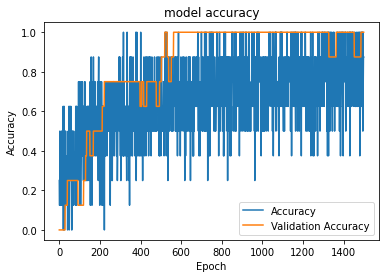

In [13]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

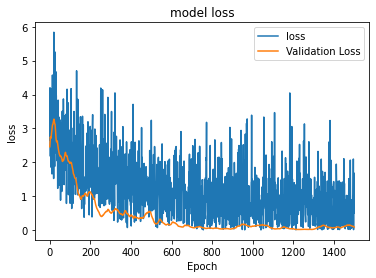

In [14]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [15]:
json_string = net_final.to_json()
with open("resnet_eye_model.config", "w") as text_file:    
    text_file.write(json_string)

In [16]:
#net_final.save(WEIGHTS_FINAL)
net_final.save_weights(WEIGHTS_FINAL)